In [1]:
import numpy as np
import sys
import csv
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
path="../../results/noise_model_2/model3_crossvalidation/results_20/"

In [3]:
objects = []
with (open(path+"model3_tridiag3_p100_N500_I0_cv_run2_select_param.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
objects

[{'s': 1,
  'alpha': 1,
  'lb': [0.06171199786407932, 0.05868494241001929],
  'ub': [0.8437948204136022, 0.4687437982493205]}]

In [4]:
filename = 'model3_tridiag1_p100_N500_I0_cv_run2_bic_ng.npy'
g1 = np.load(path+filename)
g1 = g1.reshape((3,3,5,5))


filename = 'model3_tridiag2_p100_N500_I0_cv_run2_bic_ng.npy'
g2 = np.load(path+filename)
g2 = g2.reshape((3,3,5,5))


filename = 'model3_tridiag3_p100_N500_I0_cv_run2_bic_ng.npy'
g3 = np.load(path+filename)
g3 = g3.reshape((3,3,5,5))

In [5]:
s_list     = np.arange(1, 10, 3)
alpha_list = np.arange(1, 9, 3)

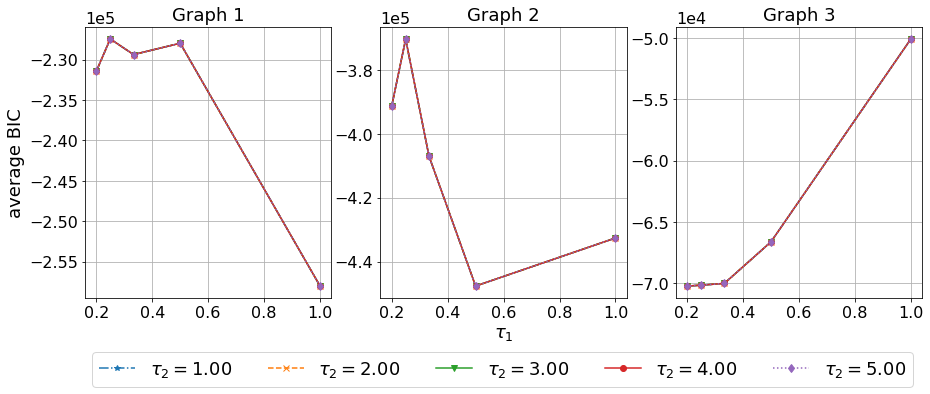

In [9]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
fmt_list = ['-.*', '--x','-v','-o', ':d',':+']
m_size=7.5
fig, ax = plt.subplots(nrows=1, ncols=3,  figsize=(15,5))


for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[0].plot(1/(np.arange(5)+1),g1[i,j,:,k],fmt_list[k], label=r"$\tau_2=%.2f$"%(k+1))



for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[1].plot(1/(np.arange(5)+1), g2[i,j,:,k],fmt_list[k], label=r"$\tau_2=%.2f$"%(k+1))



for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[2].plot(1/(np.arange(5)+1), g3[i,j,:,k],fmt_list[k], label=r"$\tau_2=%.2f$"%(k+1))


ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_title('Graph 1', fontsize=18)
ax[1].set_title('Graph 2', fontsize=18)
ax[2].set_title('Graph 3', fontsize=18)
#ax[2,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
#ax[2,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
for i in range(3):
    #for j in range(2):
    ax[i].grid()
ax[0].set_ylabel('average BIC', fontsize=18)
ax[1].set_xlabel(r'$\tau_1$', fontsize=18)
#ax[2,1].set_xlabel(r'$\times\;\sigma_\max(A^{m (0)})$', fontsize=18)


handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.9, -0.0), prop={'size': 18})
plt.savefig('BIC_tau1.pdf',bbox_inches='tight')

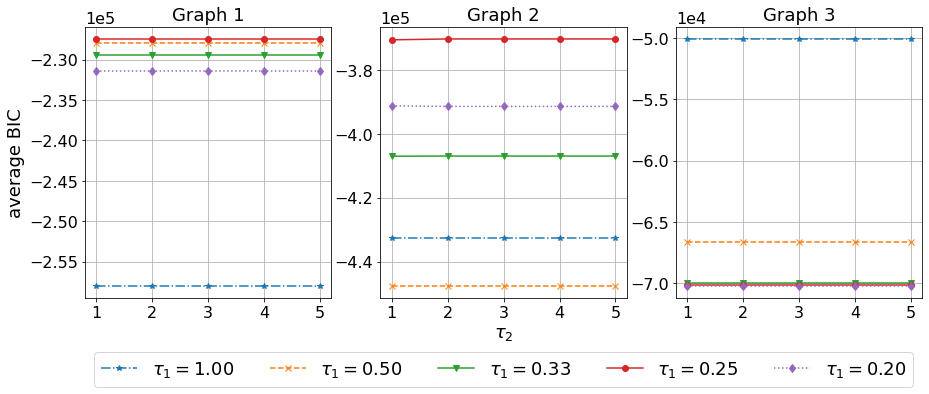

In [12]:
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
fmt_list = ['-.*', '--x','-v','-o', ':d',':+']
m_size=7.5
fig, ax = plt.subplots(nrows=1, ncols=3,  figsize=(15,5))



for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[0].plot(np.arange(5)+1, g1[i,j,k,:],fmt_list[k], label=r"$\tau_1=%.2f$"%(1/(k+1)))



for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[1].plot(np.arange(5)+1, g2[i,j,k,:],fmt_list[k], label=r"$\tau_1=%.2f$"%(1/(k+1)))


for i in range(1,2):
    for j in range(1,2):
        for k in range(5):
            ax[2].plot(np.arange(5)+1, g3[i,j,k,:],fmt_list[k], label=r"$\tau_1=%.2f$"%(1/(k+1)))
            
ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[0].set_title('Graph 1', fontsize=18)
ax[1].set_title('Graph 2', fontsize=18)
ax[2].set_title('Graph 3', fontsize=18)
for i in range(3):
    #for j in range(2):
    ax[i].grid()
ax[0].set_ylabel('average BIC', fontsize=18)

ax[1].set_xlabel(r'$\tau_2$', fontsize=18)


handles, labels = ax[0].get_legend_handles_labels()

fig.legend(handles, labels, ncol=5, bbox_to_anchor=(.9, -0.0), prop={'size': 18})


plt.savefig('BIC_tau2.png',bbox_inches='tight')